Напиши программный код для Google Colab на языке Python. Задание:
1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn).
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную.
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA.
5. Визуализируйте предсказания для тестовой выборки и центры классов (разделяющую плоскость можно не строить, но обратите внимание, что класса 3).
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width.
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию.

Убедись, что:
1. Для задачи классификации после построения модели посчитана метрика accuracy, и она больше 0.7.
2. Количество кластеров равно количеству классов в зависимой переменной.
3. Построена модель LDA.
4. Визуализированы предсказания для тестовой выборки и центры классов.
5. Подобрано оптимальное число кластеров для алгоритма kmeans и визуализирована полученная кластеризация.

Точность LDA: 0.868
Значение сооветствует критерию


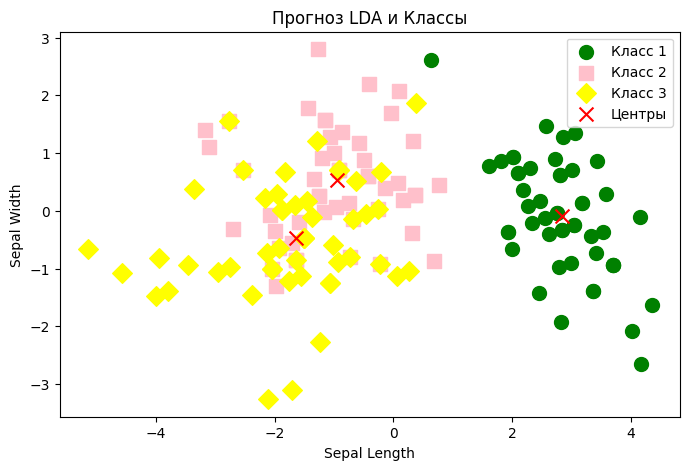

Оптимальное число кластеров: 2


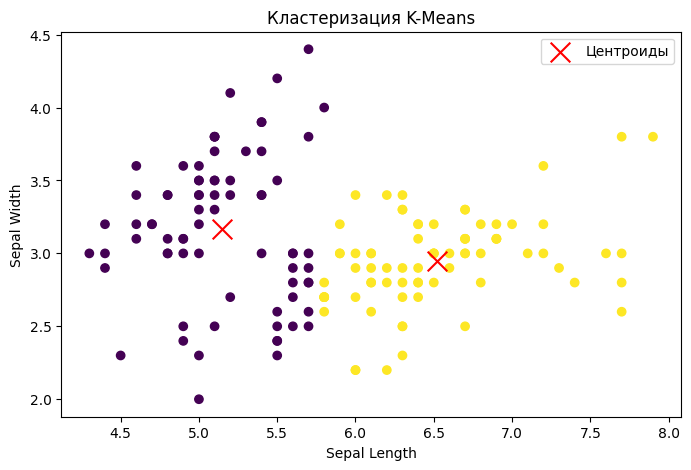

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

iris = load_iris()
X = iris.data[:, :2]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

y_pred_lda = lda.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_lda)
print(f"Точность LDA: {accuracy:.3f}")

if accuracy > 0.7:
  print("Значение сооветствует критерию")
else:
  print("Значение не сооветствует критерию")

plt.figure(figsize=(8, 5))
plt.scatter(X_test_lda[:, 0], X_test_lda[:, 1], c=y_test, cmap='viridis')
plt.scatter(lda.transform(iris.data[:, :2])[iris.target == 0, 0], lda.transform(iris.data[:, :2])[iris.target == 0, 1], c='green', marker='o', s=100, label='Класс 1')
plt.scatter(lda.transform(iris.data[:, :2])[iris.target == 1, 0], lda.transform(iris.data[:, :2])[iris.target == 1, 1], c='pink', marker='s', s=100, label='Класс 2')
plt.scatter(lda.transform(iris.data[:, :2])[iris.target == 2, 0], lda.transform(iris.data[:, :2])[iris.target == 2, 1], c='yellow', marker='D', s=100, label='Класс 3')

centers = lda.means_
centers_lda = lda.transform(centers)
plt.scatter(centers_lda[:, 0], centers_lda[:, 1], color='red', marker='x', s=100, label='Центры')
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title("Прогноз LDA и Классы")
plt.show()

silhouette_scores = []
for n_clusters in range(2, 5):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_n_clusters = np.argmax(silhouette_scores) + 2
print(f"Оптимальное число кластеров: {optimal_n_clusters}")

kmeans = KMeans(n_clusters=optimal_n_clusters)
cluster_labels = kmeans.fit_predict(X)

plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Центроиды')
plt.legend()
plt.title("Кластеризация K-Means")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()